In [72]:
import pandas as pd
import numpy as np

# models 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#metrics
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
from sklearn.metrics import root_mean_squared_error

# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#### dataframe

In [2]:
df = pd.read_csv('/Users/meganwilliams/Documents/GitHub/ds-mod-1-1024-code-solutions/time-series-2/AirPassengers.csv')

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df.set_index('Month', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


#### functions

In [10]:
def plotANDadf(data): 
    data.plot();
    print(adfuller(data.dropna())[1])

In [11]:
def arima_eval(noise, model): 
    noise.plot()
    model.fittedvalues.plot() 
    print('aic: ', model.aic) 
    print('bic: ', model.bic)



#### prep

0.991880243437641


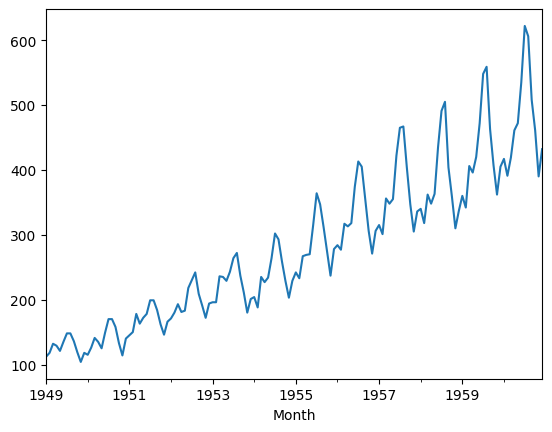

In [12]:
plotANDadf(df['#Passengers'])

In [13]:
passenger_log = np.log(df['#Passengers'])

0.4223667747703916


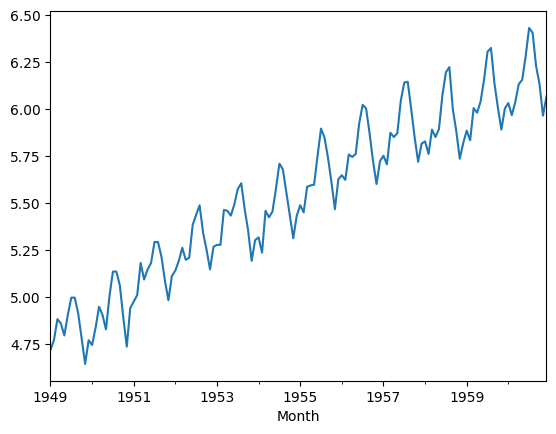

In [14]:
plotANDadf(passenger_log)

In [15]:
passenger_log_diff1 = passenger_log.diff()

0.07112054815086269


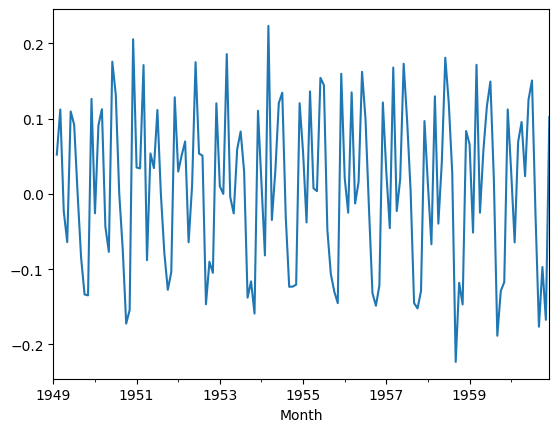

In [16]:
plotANDadf(passenger_log_diff1)

In [17]:
passenger_log_diff2 = passenger_log.diff(2)

0.021919114564039187


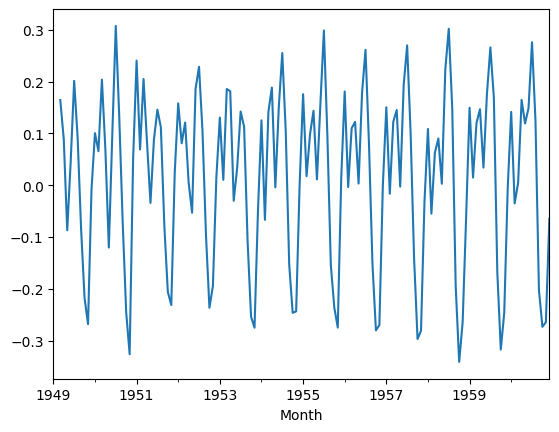

In [18]:
plotANDadf(passenger_log_diff2)

In [19]:
passenger_log_diff3 = passenger_log.diff(3)

0.06923710234055533


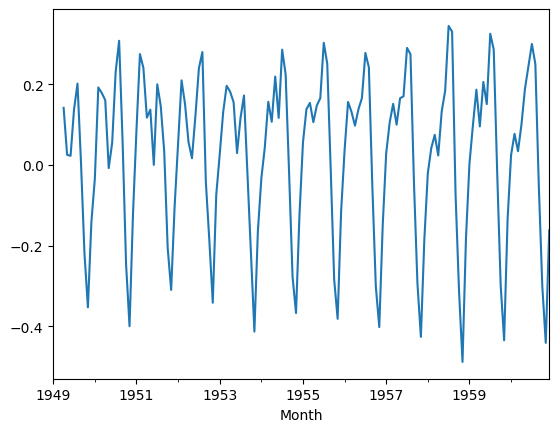

In [20]:
plotANDadf(passenger_log_diff3)

#### question 1

In [21]:
passangers = df['#Passengers']
passangers

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [22]:
decomp = seasonal_decompose(passangers)

In [23]:
trend = decomp.trend
seasonal = decomp.seasonal
noise = decomp.resid

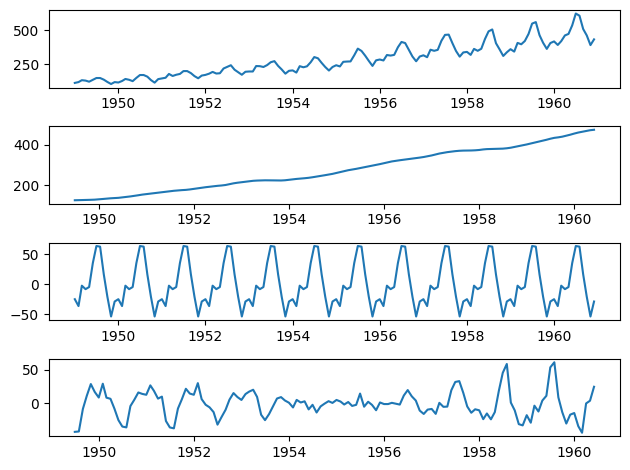

In [24]:
fig, ax = plt.subplots(nrows=4, ncols=1)
ax[0].plot(passangers.index, passangers.values)
ax[1].plot(passangers.index, trend)
ax[2].plot(passangers.index, seasonal)
ax[3].plot(passangers.index, noise)
fig.tight_layout()

5.516868902226052e-06


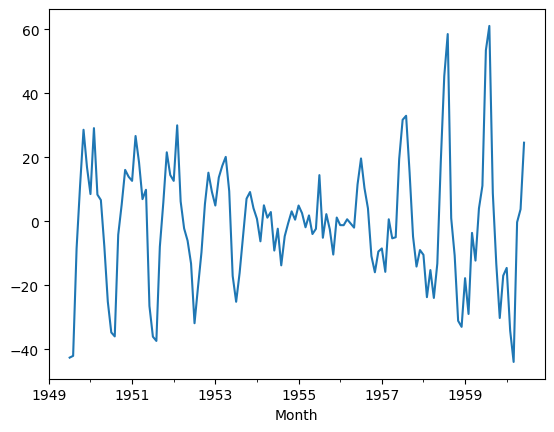

In [25]:
plotANDadf(noise)

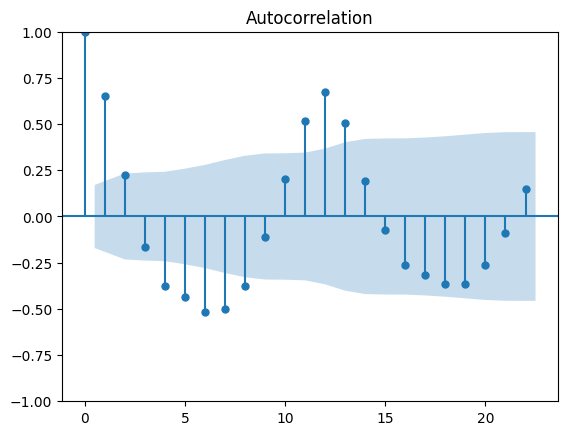

In [53]:
plot_acf(noise.dropna());

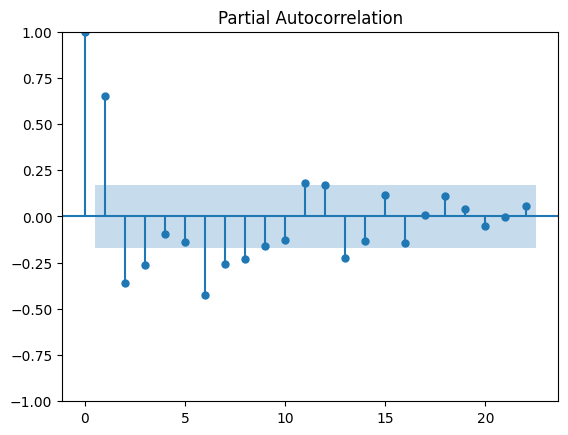

In [54]:
plot_pacf(noise.dropna());

In [26]:
noise_diff1 = noise.diff()

6.450716921110031e-10


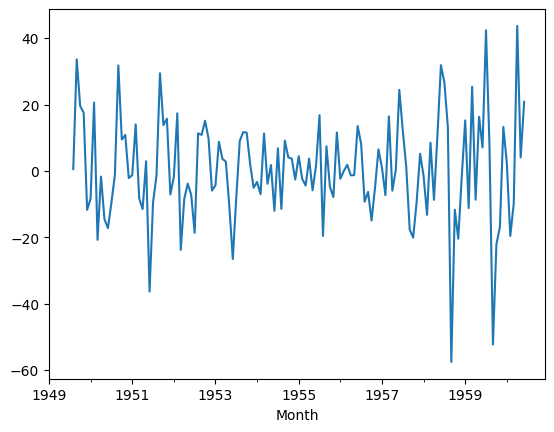

In [27]:
plotANDadf(noise_diff1)

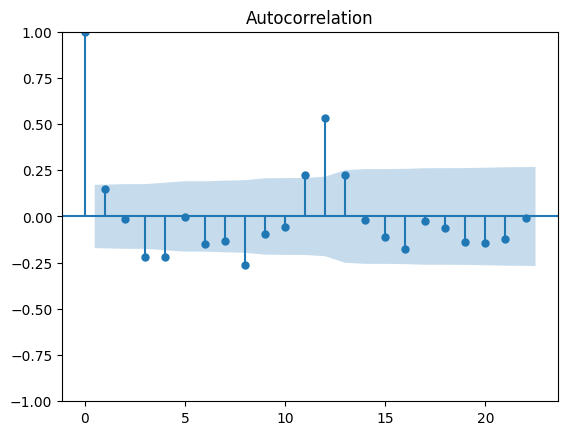

In [28]:
plot_acf(noise_diff1.dropna());

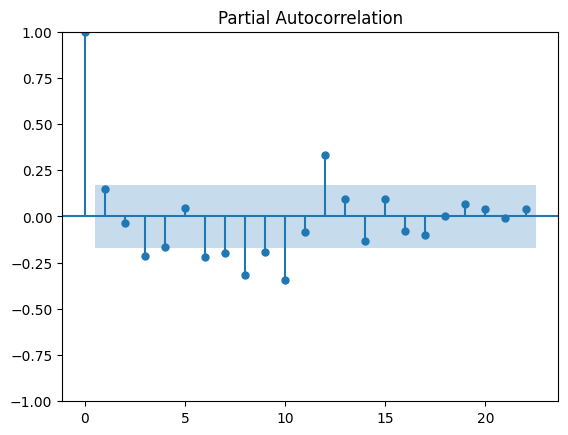

In [29]:
plot_pacf(noise_diff1.dropna());

##### arima 12

In [30]:
ar12 = ARIMA(noise, order=(12, 1, 0)).fit()
ma12 = ARIMA(noise, order=(0,1,12)).fit()
ar12ma12 = ARIMA(noise, order=(12,1,12)).fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

aic:  993.1875525788519
bic:  1031.7045327722306


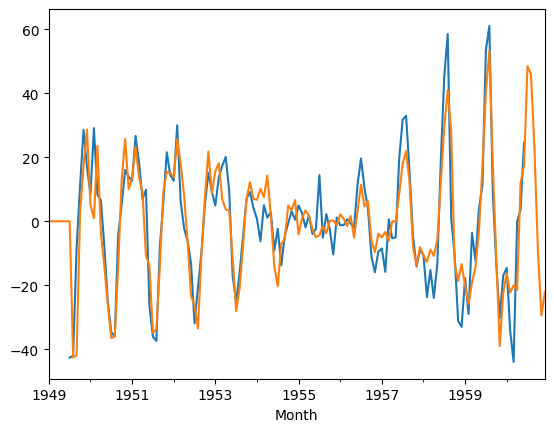

In [31]:
arima_eval(noise, ar12)

aic:  1041.146277033298
bic:  1079.6632572266767


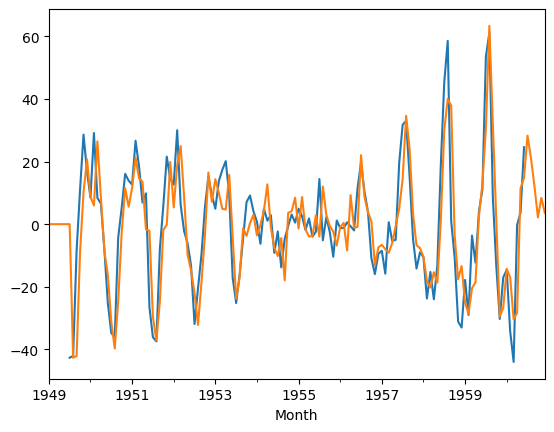

In [32]:
arima_eval(noise, ma12)

aic:  984.1167354455006
bic:  1058.1878512019982


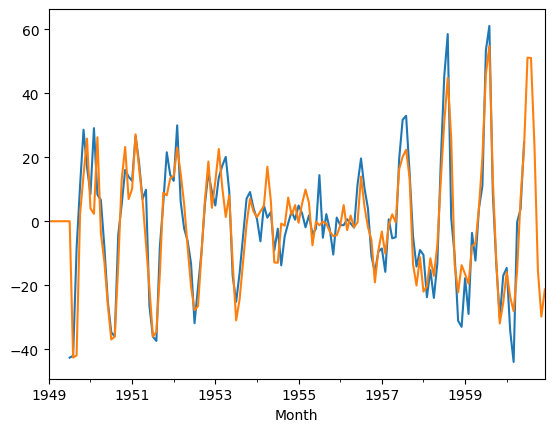

In [33]:
arima_eval(noise, ar12ma12)

##### arima 13

In [47]:
ar13 = ARIMA(noise, order=(13, 1, 0)).fit()
ma13 = ARIMA(noise, order=(0,1,13)).fit()
ar13ma13 = ARIMA(noise, order=(13,1,13)).fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

aic:  995.0261001454807
bic:  1036.5059249691194


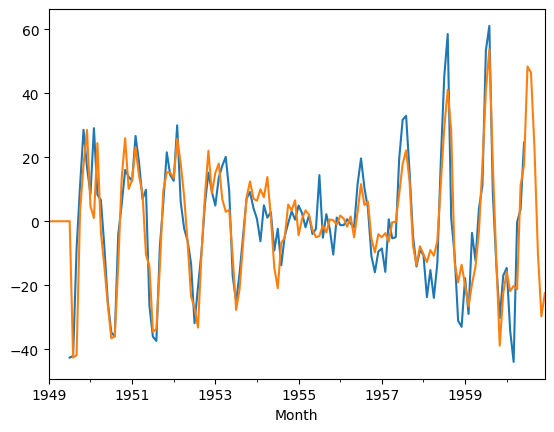

In [49]:
arima_eval(noise, ar13)

aic:  1042.1114257437084
bic:  1083.591250567347


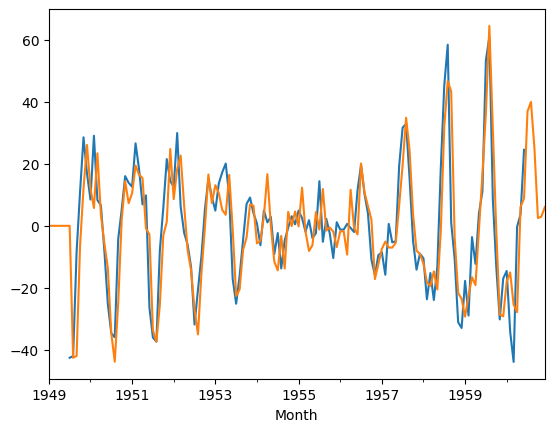

In [50]:
arima_eval(noise, ma13)

aic:  986.469859812579
bic:  1066.4666648295965


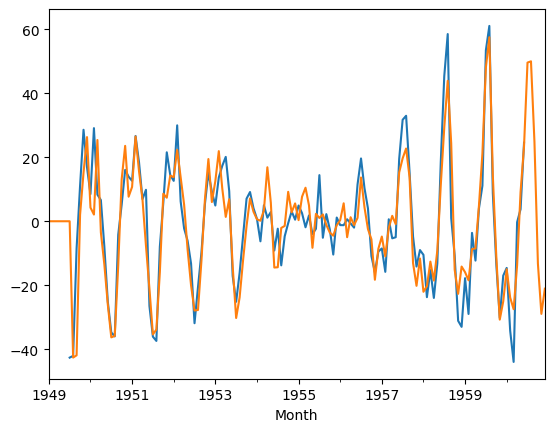

In [51]:
arima_eval(noise, ar13ma13)

##### search

In [62]:
p_vals = [1,5,6,7,11,12,13]
d_vals = [1,2,3]
q_vals = [1,5,6,7,11,12,13]

best_aic = np.inf
best_aic_pdq = (0,0,0)
best_bic = np.inf
best_bic_pdq = (0,0,0)

In [ ]:
for pdq in itertools.product(p_vals, d_vals, q_vals): 
    
    model = ARIMA(noise, order=pdq).fit()
    aic = model.aic

    if aic < best_aic: 
        best_aic = aic
        best_aic_pdq = pdq



In [64]:
best_aic

np.float64(977.0026773099021)

In [65]:
best_aic_pdq

(11, 1, 5)

In [ ]:
for pdq in itertools.product(p_vals, d_vals, q_vals): 
    
    model = ARIMA(noise, order=pdq).fit()
    bic = model.bic

    if bic < best_bic: 
        best_bic = bic
        best_bic_pdq = pdq

In [67]:
best_bic_pdq

(12, 1, 1)

In [68]:
best_bic

np.float64(1027.1591187250613)

#### question 2

0.0


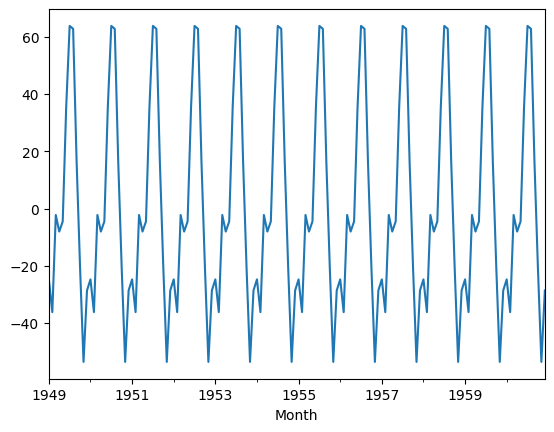

In [34]:
plotANDadf(seasonal)

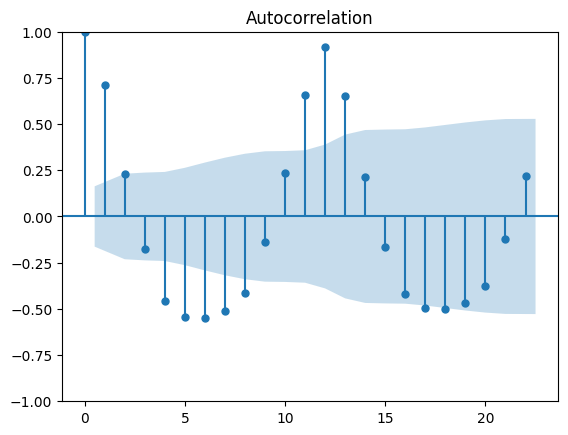

In [40]:
plot_acf(seasonal);

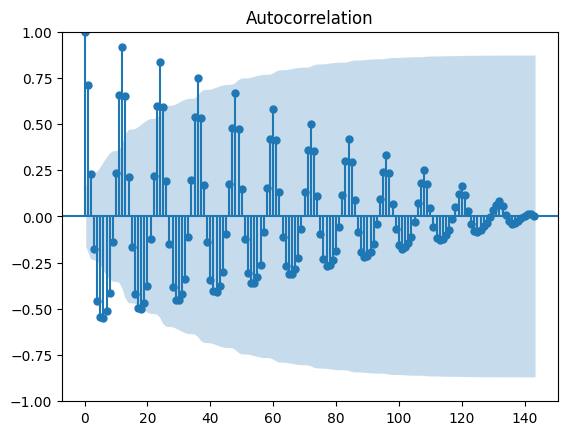

In [38]:
plot_acf(seasonal, lags=np.arange(0, len(seasonal)));

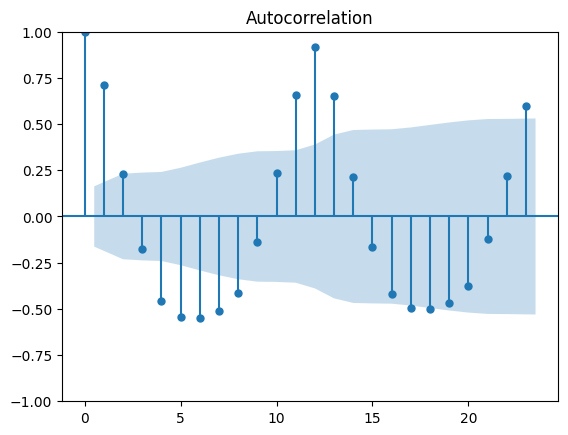

In [46]:
plot_acf(seasonal, lags=np.arange(0,24));

In [ ]:
sarima = SARIMAX(passangers, order=(11,1,5), seasonal_order=(2,0,3,12), trend='ct').fit()

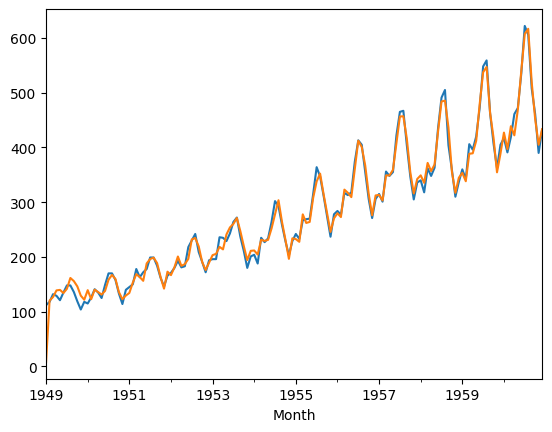

In [71]:
passangers.plot()
sarima.fittedvalues.plot();

In [73]:
sarima_fitted = sarima.fittedvalues

In [74]:
root_mean_squared_error(passangers, sarima_fitted)

np.float64(13.878635703518691)